# **Problem 2: The Snake Game is Here!**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
import imageio

# A.

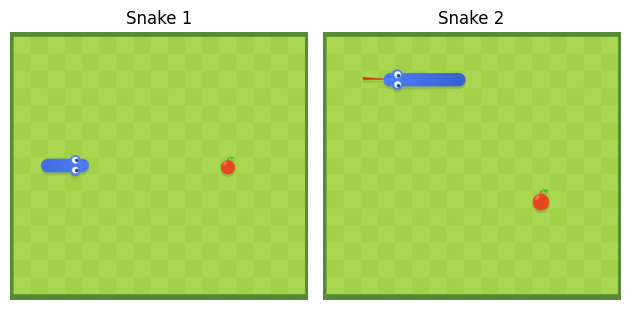

In [2]:
image_1 = cv2.imread('Q2_snake1.png')
image_2 = cv2.imread('Q2_snake2.png')

img1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Snake 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Snake 2")
plt.axis('off')

plt.tight_layout()
plt.show()

• The apple

In [3]:
hsv = cv2.cvtColor(image_1, cv2.COLOR_BGR2HSV)

# Background color range
lower_green = np.array([35, 50, 50])  
upper_green = np.array([85, 255, 255]) 

# Creating background and object masks
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_objects = cv2.bitwise_not(mask_green)

contours, _ = cv2.findContours(mask_objects, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
object_coords = []

# Store bounding box coordinates
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    object_coords.append((x, y, w, h)) 

apple_contour = min(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(apple_contour)

# Crop the apple
apple = image_1[y:y+h, x:x+w]

cv2.imwrite('apple.png', apple)
cv2.imshow('Apple', apple)
cv2.waitKey(0)
cv2.destroyAllWindows()

• The snake before/after eating the apple

In [4]:
def extract_snake(image_path, output_name):
    image = cv2.imread(image_path)

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([35, 50, 50])  
    upper_green = np.array([85, 255, 255])  

    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    mask_objects = cv2.bitwise_not(mask_green)

    contours, _ = cv2.findContours(mask_objects, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Finding the snake
    snake_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(snake_contour)

    # Crop the snake
    snake = image[y:y+h, x:x+w]

    cv2.imwrite(output_name, snake)
    cv2.imshow('Snake', snake)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Extract snake before/after eating apple
extract_snake('Q2_snake1.png', 'snake_before_eating_the_apple.png')
extract_snake('Q2_snake2.png', 'snake_after_eating_the_apple.png')

• The empty game board

In [5]:
def fill_holes(image_1, image_2):

    diff = cv2.absdiff(image_1, image_2)
    diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

# Thresholding for binarization
    _, thresh = cv2.threshold(diff_gray, 30, 255, cv2.THRESH_BINARY)

    labeled, num_features = label(thresh)

    empty_board = image_1.copy()

    for i in range(1, num_features + 1):
        coords = np.where(labeled == i)
        if len(coords[0]) > 0:  
            y_min, y_max = min(coords[0]), max(coords[0])
            x_min, x_max = min(coords[1]), max(coords[1])

            # Sampling surrounding regions 
            samples = [
                image_1[max(y_min - 5, 0):y_min, x_min:x_max],  # up
                image_1[y_max:min(y_max + 5, image_1.shape[0]), x_min:x_max],  # down
                image_1[y_min:y_max, max(x_min - 5, 0):x_min],  # left
                image_1[y_min:y_max, x_max:min(x_max + 5, image_1.shape[1])]  # right
            ]

            avg_color = np.mean([np.mean(sample, axis=(0, 1)) for sample in samples], axis=0)

            # Filling the hole with the average colors
            empty_board[y_min:y_max, x_min:x_max] = avg_color

    cv2.imwrite('empty_board_filled.png', empty_board)
    cv2.imshow('Empty Board', empty_board)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

fill_holes(image_1, image_2)

# B.

In [6]:
def overlay_image(background, overlay, x, y):
    """قرار دادن تصویر overlay روی bg در مختصات (x, y)."""
    h, w = overlay.shape[:2]
    background[y:y+h, x:x+w] = overlay
    return background

# Load game components 
initial_frame = cv2.imread("Q2_snake1.png")
empty_board = cv2.imread("empty_board_filled.png")
apple = cv2.imread("apple.png")
snake_before = cv2.imread("snake_before_eating_the_apple.png")
snake_after = cv2.imread("snake_after_eating_the_apple.png")

# Position configuration
snake_init = (50, 50)             
apple_pos = (300, 200)           
snake_final = (apple_pos[0] - 10, apple_pos[1] - 10)   # Final snake position near apple

# Initial frame
frames = []
frames.append(cv2.cvtColor(initial_frame, cv2.COLOR_BGR2RGB))

# Generate intermediate frames
num_steps = 20
for i in range(num_steps):
    t = i / (num_steps - 1)
    curr_x = int((1 - t) * snake_init[0] + t * snake_final[0])
    curr_y = int((1 - t) * snake_init[1] + t * snake_final[1])

    frame = empty_board.copy()
    if t < 1.0:
        frame = overlay_image(frame, apple, apple_pos[0], apple_pos[1])
    frame = overlay_image(frame, snake_before, curr_x, curr_y)
    frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Final frame
final_frame = overlay_image(empty_board.copy(), snake_after, snake_final[0], snake_final[1])
frames.append(cv2.cvtColor(final_frame, cv2.COLOR_BGR2RGB))

imageio.mimsave("snake_game.gif", frames, duration=0.1)
print("GIF saved as 'snake_game.gif'.")

GIF saved as 'snake_game.gif'.
